In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from PointTracking import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Total Imag Time:  1.360548496246338
kmax:  4.0212385965949355
T:  1.155025703624629
(241, 128, 128)
(1, 128, 128)


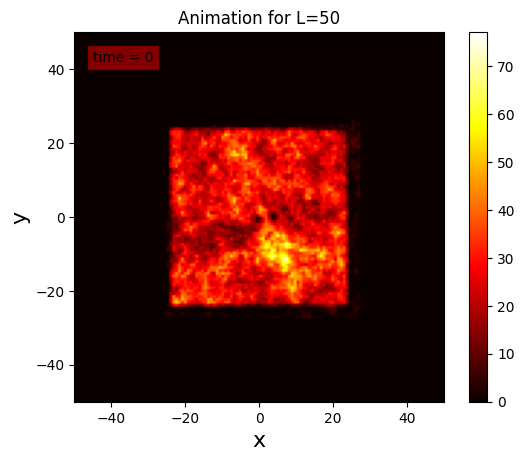

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 60000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/7, dst = False, vortex = True)

In [3]:
tracker = pt(g.snaps, g.dx, g.L) # initialize tracker object to track the vortices in each frame of snaps 

In [5]:
vortices, antivortices = pt.getAllVortices(tracker) 

(array([], dtype=float64),
 array([[24.609375, 24.609375],
        [27.734375, 25.390625]]))

In [16]:
pt.labelVortices(tracker)

Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 24.609375]]
Fewer detected points
[]
[[24.609375 24.609375]
 [27.734375 24.609375]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.390625]]
Fewer detected points
[]
[[27.734375 24.609375]
 [24.609375 25.3

In [17]:
L  = g.L 
dx = g.dx 

In [38]:
print(np.shape(tracker.points[3].getTrajectory()))
print(np.shape(g.snaps))

(241, 2)
(241, 128, 128)


(4,)


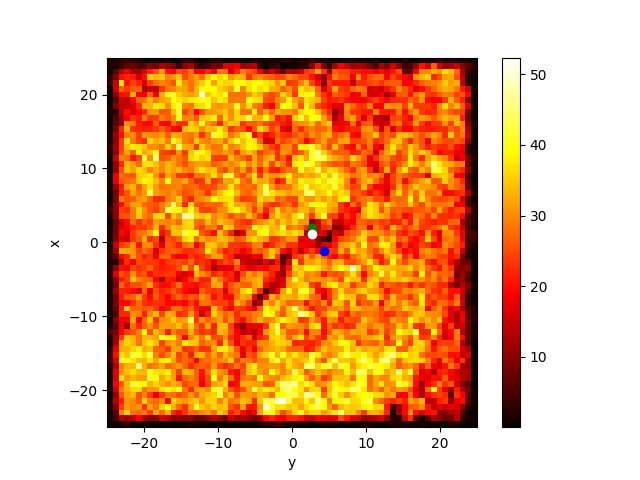

In [49]:
s = 240
print(np.shape(tracker.points))
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()
v3_traj = tracker.points[2].getTrajectory()
v4_traj = tracker.points[3].getTrajectory()
box = g.snaps[s][int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
plt.scatter(v1_traj[s][0]-L/2,v1_traj[s][1]-L/2, color = 'blue', alpha = 1)
plt.scatter(v2_traj[s][0]-L/2,v2_traj[s][1]-L/2, color = 'green', alpha = 1)
plt.scatter(v3_traj[s][0]-L/2,v3_traj[s][1]-L/2, color = 'purple', alpha = 1)
plt.scatter(v4_traj[s][0]-L/2,v4_traj[s][1]-L/2, color = 'white', alpha = 1)
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.xlabel('y')
plt.ylabel('x')

plt.show() 

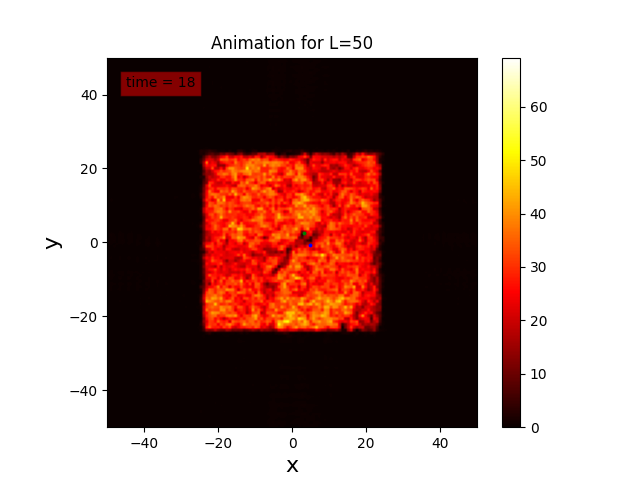

In [50]:
%matplotlib widget
filename = 'test'
path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt


fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')


# set trajectories: 
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()

v1 = plt.scatter(v1_traj[0][0]+0.5-L/2,v1_traj[0][1]+0.5-L/2, color = 'blue', alpha = 1, s = 3)
v2 = plt.scatter(v2_traj[0][0]+0.5-L/2,v2_traj[0][1]+0.5-L/2, color = 'green', alpha = 1, s = 3)

# plt.xlim(-5,5)
# plt.ylim(-5,5)

time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
time_text.set_text('time = 0')

plt.xlabel("x", fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.title(f'Animation for L={g.L}')
fig.colorbar(data)

def animate(i): 
    data.set_data(np.abs(g.snaps[i])**2)
    # fix these: 

    v1.set_offsets([v1_traj[i][0]+0.5-L/2,v1_traj[i][1]+0.5-L/2])
    v2.set_offsets([v2_traj[i][0]+0.5-L/2,v2_traj[i][1]+0.5-L/2])
    time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
    #return data, time_text
    return data
anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
anim.save(path)
plt.show()